# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/Week5/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

<ipython-input-3-51f4459c1795>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('us_perm_visas.csv'))


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [82]:
df_select = df[["case_status", "class_of_admission","job_info_work_state","wage_offer_from_9089"]]

In [83]:
df_select.head()

,case_status,class_of_admission,job_info_work_state,wage_offer_from_9089
0,Certified,J-1,NY,75629.0
1,Denied,B-2,NY,37024.0
2,Certified,H-1B,MD,47923.0
3,Certified,B-2,NY,10.97
4,Certified,L-1,NY,100000.0


# 3.) Clean your data for a decision tree


In [84]:
df_select['wage_offer_from_9089'][[202865,209472]] = np.nan

<ipython-input-84-7edc6b18fad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['wage_offer_from_9089'][[202865,209472]] = np.nan


In [85]:
df_select['wage_offer_from_9089'][135269:] =df_select['wage_offer_from_9089'][135269:].str.replace(',','')
df_select['wage_offer_from_9089'][135269:] = pd.to_numeric(df_select['wage_offer_from_9089'][135269:])

<ipython-input-85-d81e7fd696ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['wage_offer_from_9089'][135269:] =df_select['wage_offer_from_9089'][135269:].str.replace(',','')
<ipython-input-85-d81e7fd696ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['wage_offer_from_9089'][135269:] = pd.to_numeric(df_select['wage_offer_from_9089'][135269:])


In [86]:
df_select['wage_offer_from_9089'] = df_select['wage_offer_from_9089'].astype(float)
df_select['wage_offer_from_9089'] = np.log(df_select['wage_offer_from_9089'])

<ipython-input-86-69302794debf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['wage_offer_from_9089'] = df_select['wage_offer_from_9089'].astype(float)
<ipython-input-86-69302794debf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['wage_offer_from_9089'] = np.log(df_select['wage_offer_from_9089'])


In [87]:
df_select.shape

(374362, 4)

In [88]:
df_select.isnull().sum()

case_status                  0
class_of_admission       22845
job_info_work_state        103
wage_offer_from_9089    237611
dtype: int64

In [89]:
df_select.dropna(axis=0, how='any', inplace = True)

<ipython-input-89-0a95c742961e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.dropna(axis=0, how='any', inplace = True)


In [90]:
df_select.shape

(128186, 4)

In [91]:
df_select.case_status.value_counts()

Certified            70762
Certified-Expired    43183
Denied                8243
Withdrawn             5998
Name: case_status, dtype: int64

In [101]:
df_select['case_status'] = df_select['case_status'].replace('Certified', 3)
df_select['case_status'] = df_select['case_status'].replace('Certified-Expired', 2)
df_select['case_status'] = df_select['case_status'].replace('Withdrawn', 1)
df_select['case_status'] = df_select['case_status'].replace('Denied', 0)
df_select['job_info_work_state'] = df_select['job_info_work_state'].replace('CALIFORNIA', 'CA')
df_select['job_info_work_state'] = df_select['job_info_work_state'].replace('TEXAS', 'TX')

<ipython-input-101-fd83da9415cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['case_status'] = df_select['case_status'].replace('Certified', 3)
<ipython-input-101-fd83da9415cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['case_status'] = df_select['case_status'].replace('Certified-Expired', 2)
<ipython-input-101-fd83da9415cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [103]:
df_select.head()

,case_status,class_of_admission,job_info_work_state,wage_offer_from_9089
0,3,J-1,NY,11.233595
1,0,B-2,NY,10.519322
2,3,H-1B,MD,10.777351
3,3,B-2,NY,2.395164
4,3,L-1,NY,11.512925


In [104]:
df_select.shape

(128186, 4)

In [105]:
dum_df = pd.get_dummies(df_select, columns=["class_of_admission","job_info_work_state"])

In [106]:
X = dum_df.drop(columns = "case_status")
y = df_select["case_status"]

# 4.) Fit and plot a decision tree of depth X


In [107]:
from sklearn import tree

In [108]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'wage_offer_from_9089 <= 10.839\ngini = 0.575\nsamples = 128186\nvalue = [8243, 5998, 43183, 70762]\nclass = Certified'),
 Text(0.25, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.622\nsamples = 13596\nvalue = [2718, 893, 2562, 7423]\nclass = Certified'),
 Text(0.125, 0.375, 'class_of_admission_EWI <= 0.5\ngini = 0.607\nsamples = 8012\nvalue = [1807, 598, 1088, 4519]\nclass = Certified'),
 Text(0.0625, 0.125, 'gini = 0.595\nsamples = 7316\nvalue = [1507, 563, 990, 4256]\nclass = Certified'),
 Text(0.1875, 0.125, 'gini = 0.649\nsamples = 696\nvalue = [300, 35, 98, 263]\nclass = Denied'),
 Text(0.375, 0.375, 'job_info_work_state_MD <= 0.5\ngini = 0.63\nsamples = 5584\nvalue = [911, 295, 1474, 2904]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.625\nsamples = 5460\nvalue = [822, 295, 1470, 2873]\nclass = Certified'),
 Text(0.4375, 0.125, 'gini = 0.421\nsamples = 124\nvalue = [89, 0, 4, 31]\nclass = Denied'),
 Text(0.75, 0.625, 'wage_offer_from_9089 <= 11.241\ng

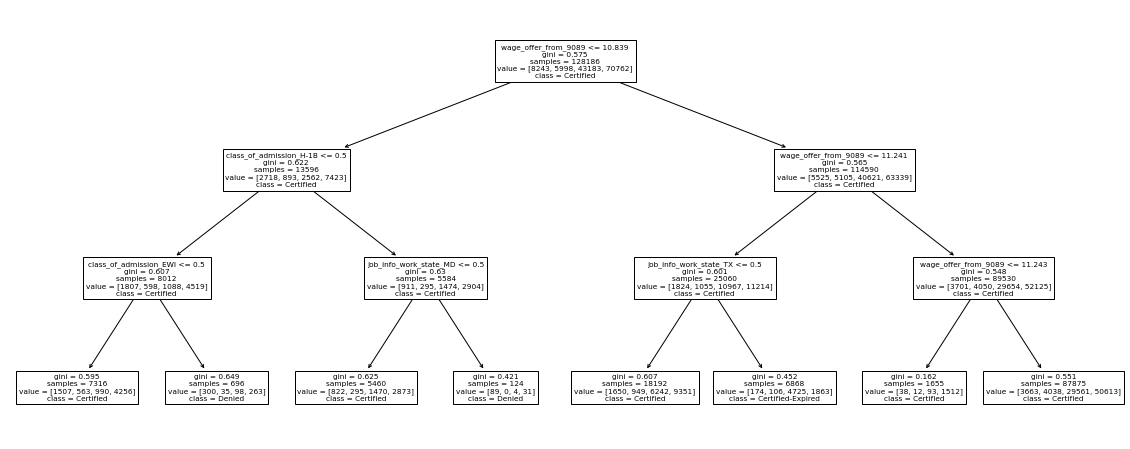

In [111]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns, class_names = ['Denied','Withdrawn','Certified-Expired','Certified'])

In [114]:
from sklearn.metrics import accuracy_score

accuracy_score(
  y,
  clf.predict(X)
  )

0.5750940040254006

# 5.) Write your interpretation of the largest (by sample size) leaf node


From this tree we can say the most important feature is wage, if one's wage is above 76343, his visa is classified as Certified. This is consistent with the reality that valuable person are less likely be rejected.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [117]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
outputs = []

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  oos_accuracy = accuracy_score(y_test, clf.predict(X_test))
  outputs.append(oos_accuracy)

In [118]:
outputs

[0.5512793842313293,
 0.5512793842313293,
 0.5753848554191804,
 0.5814697316413564,
 0.5897129186602871,
 0.5901029748283753,
 0.5908570834200125,
 0.5923653006032868,
 0.5934054503848554,
 0.5937434990638651]